<a href="https://colab.research.google.com/github/Arsen1y-dev/Summer-Practice/blob/main/Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотека Bokeh в Python

Bokeh позволяет использовать Python для создания интерактивных визуализаций, которые запускаются в веб-браузере. В отличие от популярных аналогов в области визуализации на Python, таких как *Matplotlib* и *Seaborn*, Bokeh отображает графику с использованием HTML и JavaScript. Для этого в Bokeh есть библиотека JavaScript под названием BokehJS, которая и отвечает за визуализацию в браузере.

Одним из ключевых преимуществ Bokeh является то, что она позволяет создавать интерактивные визуализации без необходимости глубокого понимания веб-разработки. С помощью набора инструментов и виджетов Bokeh можно легко добавить возможности для взаимодействия с графиком. Bokeh также предоставляет множество стилей графиков и настраиваемых параметров, позволяя адаптировать визуализации под нужды проекта.

Помимо этого, Bokeh также предоставляет возможность создания комплексных графических решений, объединяя несколько графиков и диаграмм в единые композиции.

## "Под капотом"

При создании визуализации с помощью Bokeh на Python, Bokeh преобразует эту визуализацию в файл JSON. Затем этот файл JSON отправляется в BokehJS, который и отображает визуализацию в браузере.

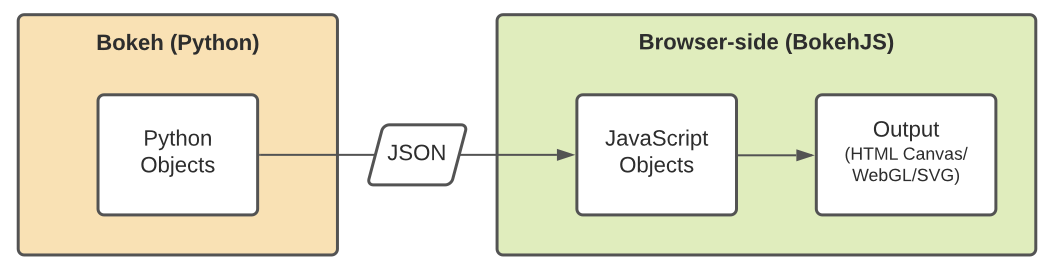

## Взаимодействие с Bokeh

Взаимодействие с Bokeh происходит через один из следующих двух интерфейсов:

1.   Высокоуровневый **bokeh.plotting**: основной интерфейс общего назначения Bokeh, аналогичный интерфейсам построения графиков в таких библиотеках, как Matplotlib или Matlab. Он автоматически покрывает многие аспекты построения графика.
2.   Низкоуровневый интерфейс **bokeh.models**: дает полный контроль над всеми параметрами графика, но при этом их все необходимо вручную определять. Также его можно использовать для дальнейшей настройки графика, созданного с помощью высокоуровневого bokeh.plotting.

Мы остановимся лишь на bokeh.plotting, так как объекты из bokeh.models в основном используются только когда требуется функционал, выходящий за рамки bokeh.plotting.

## Примеры создания графиков и диаграмм

Установка: `pip install bokeh`

Сначала нам необходимо импортировать необходимые модули:

In [ ]:
from bokeh.plotting import figure, output_file, save
import pandas as pd

`figure` нужен для инициализации самой графической фигуры (графика), `output_file` для указания имени файла для сохранения графика и `save` для сохранения в файл. Для сохранения можно также использовать `show`  (тогда после сохранения откроется в браузере) или экспортировать график в SVG/PNG с помощью соответственно `export_png` и `export_svg` (для этого однако нужно установить `selenium`).

### Точечные диаграммы

Точечная диаграмма - это диаграмма, на которой для визуализации данных используется множество точек. Эти точки могут быть представлены различными формами, такими как круги, квадраты или даже пользовательские изображения.

Для ее создания используем метод `scatter`.

In [ ]:
# Инициализация графика
p = figure()

# Данные для графика
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 2, 4, 5])

# Добавление точек на график
p.scatter(x, y, legend_label='Точки', size=15)

# Настройка заголовка
p.title.text = 'Пример точечной диаграммы'
p.title.text_font_size = '14pt'

# Сохранение графика
output_file('точечная_диаграмма.html')
save(p)

'/content/точечная_диаграмма.html'




### Линейные графики

Для создания линейного графика используем метод `line`.

In [ ]:
# Инициализация графика
p = figure()

# Данные для графика
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 2, 4, 5])

# Добавление линии на график
p.line(x, y, legend_label='Линия', line_width=2)

# Настройка заголовка
p.title.text = 'Пример линейного графика'
p.title.text_font_size = '14pt'

# Сохранение графика
output_file('линейный_график.html')
save(p)

'/content/линейный_график.html'

### Столбчатые диаграммы

Для создания столбчатой диаграммы используем метод `vbar`

In [ ]:
# Данные для графика
fruits = pd.Series(["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"])
counts = pd.Series([5, 3, 4, 2, 4, 6])

# Инициализация графика
p = figure(x_range=fruits, height=350)

# Несколько способов проставить цвет:
p.vbar(x=fruits, top=counts, width=0.9, color="indigo")  # именованный цвет из CSS
# p.vbar(x=fruits, top=counts, width=0.9, color="#00FF00")  # hex
# p.vbar(x=fruits, top=counts, width=0.9, color=(0, 100, 100))  # RGB
# p.vbar(x=fruits, top=counts, width=0.9, color=(0, 100, 100, 0.25))  # RGBA

# Настройка заголовка
p.title.text = 'Пример столбчатой диаграммы'
p.title.text_font_size = '14pt'

# Отображение графика
output_file('столбчатая_диаграмма.html')
save(p)

'/content/столбчатая_диаграмма.html'

###Круговые диаграммы

Для этого примера потребуются дополнительные импорты:

In [ ]:
from math import pi
from bokeh.transform import cumsum
from bokeh.models import ColumnDataSource

Для создания круговой диаграммы используем метод `wedge`

In [ ]:
# Данные для графика
pizza_df = pd.DataFrame(
    {
        "topping": ["Pepperoni", "Cheese", "Mixed Veggies", "Bacon"],
        "orders": [221, 212, 152, 72],
        "color": ["red", "darkorange", "darkgreen", "hotpink"],
    }
)

# Расчет углов в радианах для диаграммы
pizza_df["angle"] = pizza_df["orders"] / pizza_df["orders"].sum() * 2 * pi

pizza_data = ColumnDataSource(pizza_df)

# Инициализация графика
p = figure(
    tooltips="@topping: @orders orders",
)

# Добавление круговой диаграммы на график
p.wedge(
    x=0,
    y=1,
    radius=0.4,
    start_angle=cumsum("angle", include_zero=True),
    end_angle=cumsum("angle"),
    fill_color="color",  # используем столбец "color" для определения цветов частей
    legend_field="topping",  # используем столбец "topping" для легенды
    source=pizza_data,
)

# Настройка заголовка
p.title.text = 'Пример круговой диаграммы'
p.title.text_font_size = '14pt'

# Отображение графика
output_file('круговая_диаграмма.html')
save(p)

'/content/круговая_диаграмма.html'

### Карта

Для создания карты используем метод `add_tile`, куда передаем провайдера самой карты (в данном примере CARTO)

In [ ]:
# Данные для графика
latitudes = [1, 1000000, 9999999]
longitudes = [1, 1000000, 9999999]

# Создание графической фигуры с фоном в виде карты
p = figure(
    x_range=(-2000000, 6000000),
    y_range=(-1000000, 7000000),
    x_axis_type='mercator',
    y_axis_type='mercator'
)
p.add_tile('CARTODBPOSITRON')

# Добавление маркеров на карту
p.circle(x=longitudes, y=latitudes, size=10, color='red')

# Настройка заголовка
p.title.text = 'Маркеры на карте'
p.title.text_font_size = '14pt'

# Отображение карты с маркерами
output_file('карта_с_маркерами.html')
save(p)

'/content/карта_с_маркерами.html'

### Создание нескольких графиков на одном экране

In [ ]:
from bokeh.layouts import row

# Данные для графиков
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# Создание трех графиков
s1 = figure()
s1.scatter(x, y0, size=12, color="#53777a", alpha=0.8, marker="circle")

s2 = figure()
s2.line(x, y1, color="#c02942", alpha=0.8)

s3 = figure()
s3.scatter(x, y2, size=12, color="#d95b43", alpha=0.8, marker="square")

# Отображение графиков
output_file('несколько_графиков.html')
save(row(s1, s2, s3))

'/content/несколько_графиков.html'

## Примеры дополнительной настройки графиков

###Настройка осей, меток и заголовков графика

На примере линейного графика покажем как можно настроить оси, метки и заголовки, чтобы сделать его более читаемым и информативным. Bokeh предоставляет обширный набор инструментов для настройки всех этих аспектов.

In [ ]:
# Инициализация графика
p = figure(width = 1000)

# Данные для графика
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 2, 4, 5])

# Добавление линии на график
p.line(x, y, legend_label='Линия', line_width=2)

# Настройка осей и меток
p.xaxis.axis_label = 'Время'
p.yaxis.axis_label = 'Значение'

# Настройка заголовка
p.title.text = 'Пример линейного графика с настроенными осями и заголовком'
p.title.text_font_size = '14pt'

# Сохранение графика
output_file('настроенный_линейный_график.html')
save(p)

'/content/настроенный_линейный_график.html'

Стоит отметить, что большинство таких свойств можно проставлять и сразу при инициализации.

###Использование различных стилей линий и маркеров


Чтобы сделать графики еще более наглядными и разнообразными, можно использовать различные стили линий и маркеров.

In [ ]:
# Инициализация графика
p = figure()

# Данные для графика
x = pd.Series([1, 2, 3, 4, 5])
y1 = pd.Series([6, 7, 2, 4, 5])
y2 = pd.Series([8, 5, 3, 6, 7])

# Добавление линий с разными стилями
p.line(x, y1, legend_label='Линия 1', line_color='blue', line_width=2)
p.line(x, y2, legend_label='Линия 2', line_color='red', line_dash='dashed', line_width=2)

# Добавление маркеров
p.circle(x, y1, legend_label='Маркеры 1', fill_color='white', size=8)
p.square(x, y2, legend_label='Маркеры 2', fill_color='black', size=8)

# Настройка заголовка
p.title.text = 'Пример графика с разными стилями линий и маркеров'
p.title.text_font_size = '14pt'

# Сохранение графика
output_file('линейный_график_со_стилями.html')
save(p)

'/content/линейный_график_со_стилями.html'

Здесь мы создаем графическую фигуру и добавляем две линии с разными стилями. Первая линия имеет синий цвет и обычную сплошную линию, вторая линия – красная с пунктирной линией. Мы также добавляем маркеры к каждой линии, указывая цвет заполнения и размер маркеров. Также мы добавляем каждый этот элемент в легенду графика.

###Взаимодействие с графиками

Можем изменить стандартные инструменты интерактивности с графиком.
Они позволяют масштабировать, выделять и анализировать данные на графиках.

In [ ]:
# Данные для графика
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 2, 4, 5])

# Создание графической фигуры с измененными инструментами
p = figure(x_axis_label='X-ось', y_axis_label='Y-ось',
           tools='pan,box_zoom,reset,save')

# Добавление линии на график
p.line(x, y, legend_label='Линия', line_width=2)

# Настройка заголовка
p.title.text = 'Пример графика с настроенными инструментами'
p.title.text_font_size = '14pt'

# Отображение графика
output_file('график_с_инструментами.html')
save(p)

'/content/график_с_инструментами.html'

Здесь мы используем строку `'pan,box_zoom,reset,save'` в аргументе `tools`, чтобы добавить инструменты панорамирования, масштабирования прямоугольником, сброса масштаба и сохранения графика.

###Создание всплывающих подсказок для точек данных

Для добавления всплывающих подсказок мы можем использовать инструмент HoverTool.

In [ ]:
from bokeh.models import HoverTool

# Данные для графика
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Создание графической фигуры с всплывающей подсказкой
p = figure(x_axis_label='X-ось', y_axis_label='Y-ось',
           tools='hover,reset,save')

# Добавление линии на график
line = p.line(x, y, legend_label='Линия', line_width=10)

# Настройка всплывающей подсказки
hover = HoverTool()
hover.tooltips = [('X', '@x'), ('Y', '@y')]  # Определение формата подсказки
p.add_tools(hover)

# Настройка заголовка
p.title.text = 'График с всплывающей подсказкой'
p.title.text_font_size = '14pt'

# Отображение графика
output_file('график_с_подсказкой.html')
save(p)

'/content/график_с_подсказкой.html'

В этом примере мы создаем объект HoverTool, настраиваем формат подсказки с использованием tooltips и добавляем инструмент hover к графической фигуре.

## Картинки

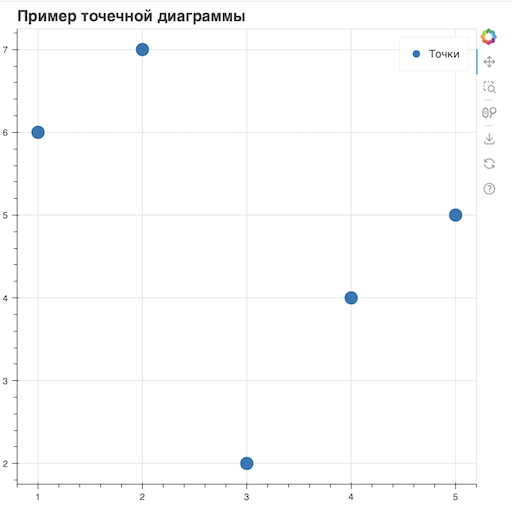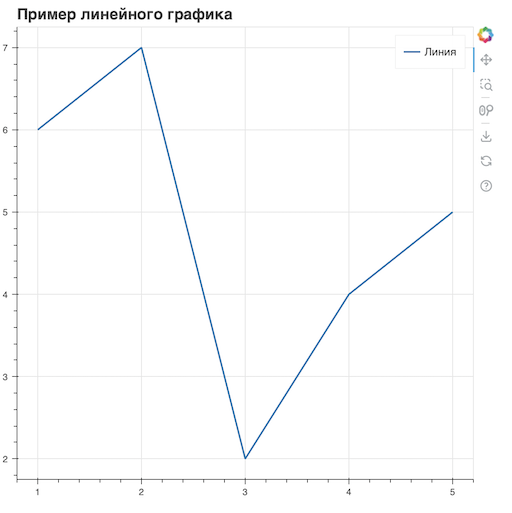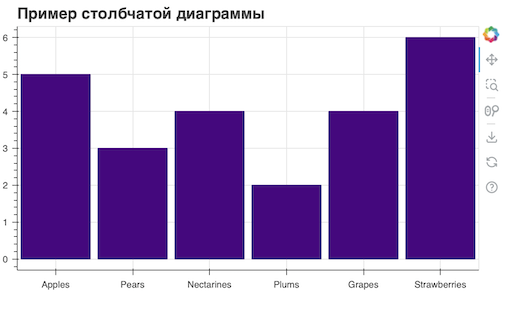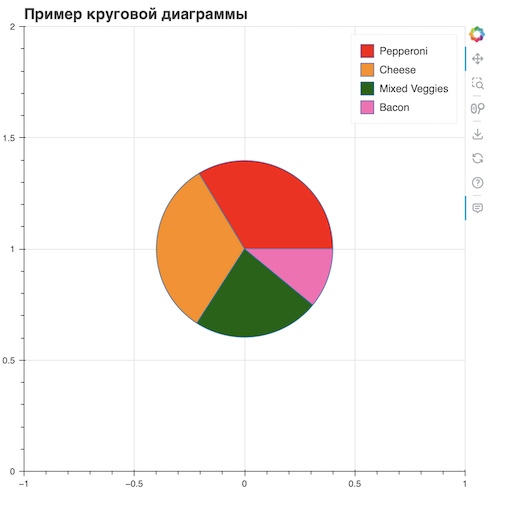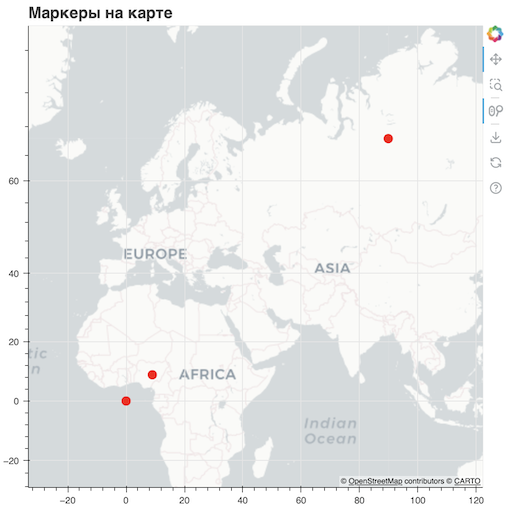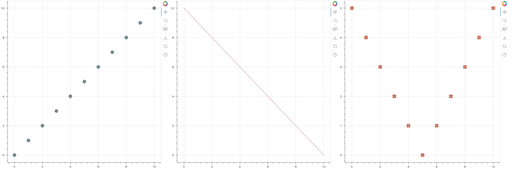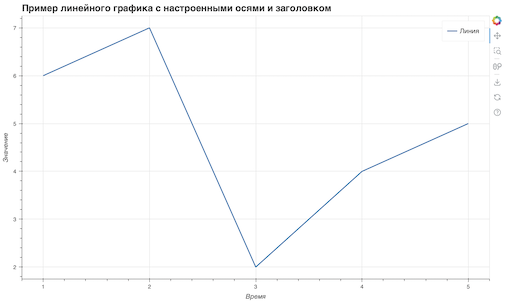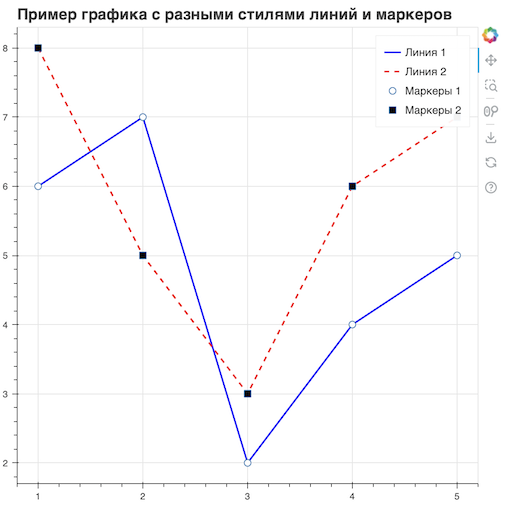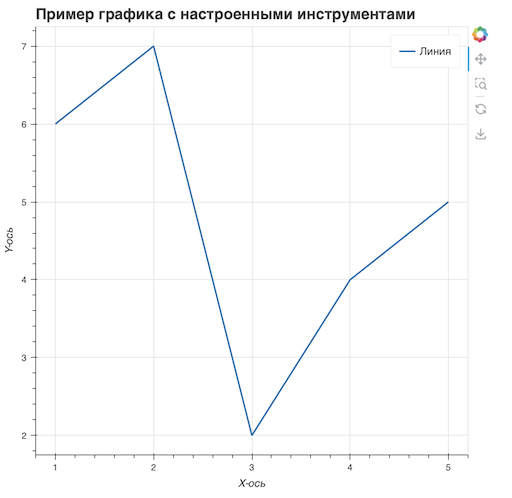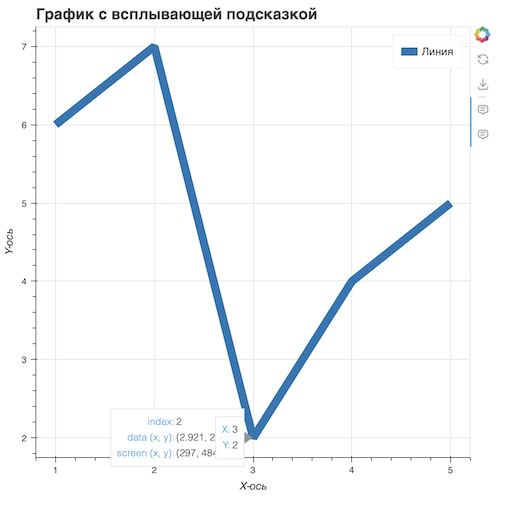